# Basic SVM

In [1]:
from sklearn import svm

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = [[0,0,0],[1,1,-1]]
y = [0,1]

In [4]:
clf = svm.SVC(gamma='auto')

In [5]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
clf.predict([[1,0,1]])

array([0])

In [8]:
clf.support_vectors_

array([[ 0.,  0.,  0.],
       [ 1.,  1., -1.]])

In [9]:
clf.support_

array([0, 1])

In [10]:
clf.n_support_

array([1, 1])

# SVM: Maximum margin seperating hyperplane

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [13]:
x,y = make_blobs(n_samples=40,centers=2,random_state=6)
x.mean()

0.5492554089596565

In [14]:
x[0:5]

array([[  6.37734541, -10.61510727],
       [  6.50072722,  -3.82403586],
       [  4.29225906,  -8.99220442],
       [  7.39169472,  -3.1266933 ],
       [  7.64306311, -10.02356892]])

In [15]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [17]:
## fit the model
clf = svm.SVC(kernel='linear')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
clf.decision_function(x)

array([ 4.06514436, -1.65754273,  3.23460104, -2.46824087,  3.24794096,
       -1.61411642, -2.52439359, -2.30688147, -1.15108112, -2.52706281,
        2.22684315,  1.9169427 , -3.9997802 ,  3.36587918,  2.23603428,
       -3.56323869, -0.99973162,  4.01793201, -3.3852309 , -1.40793786,
        1.87662501,  1.00026702,  3.57559224,  2.27088304, -2.40126618,
       -2.79232517,  2.95612787,  3.84751299, -1.69242637,  1.84782838,
        0.99946429,  2.60194582,  3.28813056, -3.39869623, -3.23105836,
       -2.44665765, -3.34260134,  2.92408634, -2.27992936,  3.44404718])

In [19]:
clf.support_

array([16, 21, 30])

In [20]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [21]:
clf.coef0

0.0

In [22]:
clf.coef_

array([[-0.2539717 , -0.83806387]])

In [23]:
clf.classes_

array([0, 1])

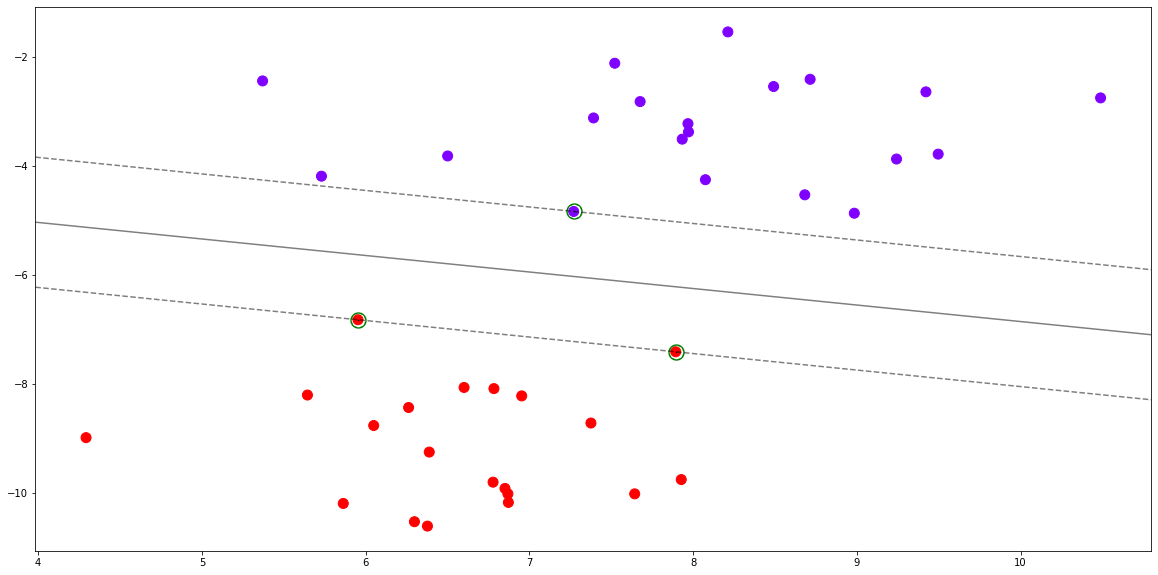

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(x[:,0],x[:,1],c=y, s=100, cmap=plt.cm.rainbow)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
yy,xx = np.meshgrid(yy,xx)

xy = np.vstack([xx.ravel(),yy.ravel()]).T
z = clf.decision_function(xy).reshape(xx.shape)

# plot decision boundary and margin lines
ax.contour(xx,yy,z,
          colors='k',
          levels=[-1,0,1],
          alpha=0.5,
          linestyles=['--','-','--'])

ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1],
          s=2,
          linewidth=15,
          facecolors='k',
          edgecolors='g'
          )